In [13]:
!pip install scikit-image

     ---------------------------------------- 23.6/23.6 MB 7.3 MB/s eta 0:00:00
     -------------------------------------- 216.4/216.4 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 9.0 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import cv2
import imutils
from skimage.filters import threshold_local
# from pyimagesearch.transform import four_point_transform
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

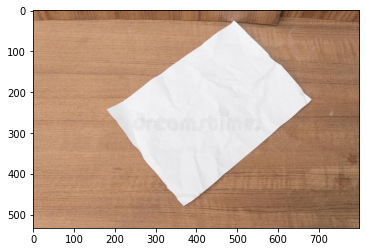

In [29]:
img_path = r'C:\Users\Clsm\Downloads\paper.jpg'
big_img = cv2.imread(img_path)
big_img = cv2.cvtColor(big_img, cv2.COLOR_BGR2RGB)
plt.imshow(big_img)

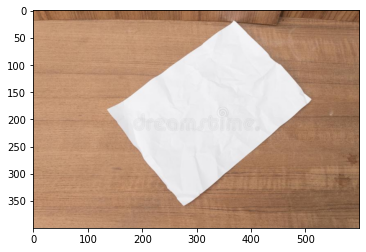

In [30]:
ratio = big_img.shape[0] / 50.0
org = big_img.copy()
img = big_img.copy()
img = imutils.resize(big_img, height = 400)
plt.imshow(img)

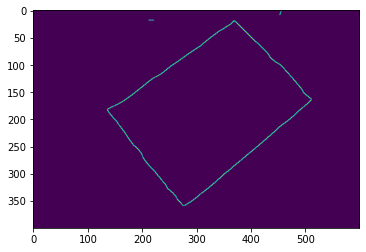

In [40]:
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
gaussian  = cv2.GaussianBlur(gray_img, (5,5),0)
edge_img = cv2.Canny(gaussian, 130, 160)
plt.imshow(edge_img)

In [44]:
cnts,_ = cv2.findContours(edge_img.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts,key=cv2.contourArea,reverse=True)[:5]

In [45]:

for c in cnts:
    peri = cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c,0.02*peri,True)
    if len(approx)==4:
        doc = approx
        break

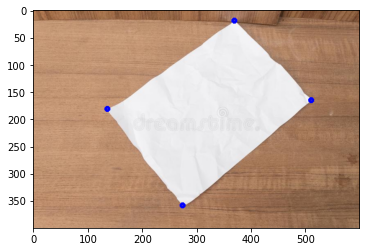

In [52]:
p=[]
for d in doc:
    tuple_point = tuple(d[0])
    cv2.circle(img,tuple_point,3,(0,0,255),4)
    p.append(tuple_point)
  
plt.imshow(img)

In [61]:
rect = np.zeros((4, 2), dtype='float32')
pts = np.array(p)
print(pts)
s = pts.sum(axis=1)
diff = np.diff(pts, axis=1)
rect[1] = pts[np.argmin(diff)]
rect[1]

[[369  19]
 [136 181]
 [274 358]
 [510 165]]


array([369.,  19.], dtype=float32)

In [62]:
def order_points(pts):
    '''Rearrange coordinates to order:
      top-left, top-right, bottom-right, bottom-left'''
    rect = np.zeros((4, 2), dtype='float32')
    pts = np.array(pts)
    s = pts.sum(axis=1)
    # Top-left point will have the smallest sum.
    rect[0] = pts[np.argmin(s)]
    # Bottom-right point will have the largest sum.
    rect[2] = pts[np.argmax(s)]
 
    diff = np.diff(pts, axis=1)
    # Top-right point will have the smallest difference.
    rect[1] = pts[np.argmin(diff)]
    # Bottom-left will have the largest difference.
    rect[3] = pts[np.argmax(diff)]
    # Return the ordered coordinates.
    return rect.astype('int').tolist()

In [63]:

pts = order_points(p)
pts

[[136, 181], [369, 19], [510, 165], [274, 358]]

In [64]:
(tl, tr, br, bl) = pts
# Finding the maximum width.
widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
maxWidth = max(int(widthA), int(widthB))
# Finding the maximum height.
heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
maxHeight = max(int(heightA), int(heightB))
# Final destination co-ordinates.
destination_corners = [[0, 0], [maxWidth, 0], [maxWidth, maxHeight], [0, maxHeight]]

In [65]:

destination_corners

[[0, 0], [304, 0], [304, 224], [0, 224]]

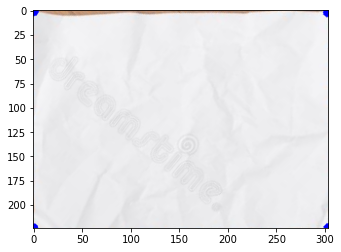

In [66]:


# Perspective Transform

# Getting the homography.
M = cv2.getPerspectiveTransform(np.float32(pts), np.float32(destination_corners))
# Perspective transform using homography.
final = cv2.warpPerspective(img, M, (destination_corners[2][0], destination_corners[2][1]), flags=cv2.INTER_LINEAR)

plt.imshow(final)

In [67]:
final.shape

(224, 304, 3)